# Let's play with randomness

We will simulate:
- A coin toss (count heads)
- Two coins toss (count heads)
- A dice roll
- Two dice roll
- 1D random walk
- 1D random walk with absorbing barriers

### Tossing a single coin

<BarContainer object of 2 artists>

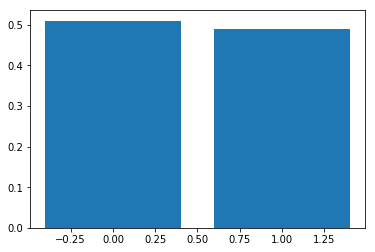

In [1]:
%matplotlib inline

# imports
import numpy as np
import matplotlib.pyplot as plt


# Tossing a single coin

def bernoulli(prob=0.5):
    # prob: probability of success
    if np.random.rand() < prob:
        return 1  # success
    else:
        return 0  # failure
    
# We will toss the coin n times

n = 100
# Tail: 0, Head: 1
coin = np.array([0, 0])

for i in range(n):
    coin[bernoulli()] += 1  # increment in 1 according to bern result
    
coin = coin / n

plt.bar(range(2), coin)
# plt.show()

### Tossing two coins



<BarContainer object of 3 artists>

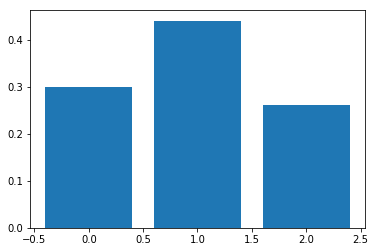

In [2]:
n = 100

# Three posible results 0, 1, or 2 heads
two_coins = np.array([0, 0, 0])

for i in range(n):
    two_coins[bernoulli() + bernoulli()] += 1  # increment in 1 according to bern result

two_coins = two_coins / n

plt.bar(range(3), two_coins)

### Let's roll a dice

<BarContainer object of 6 artists>

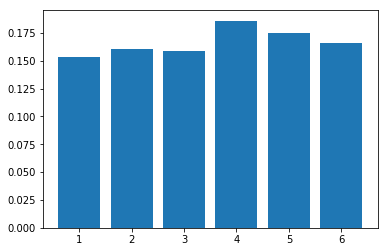

In [3]:
n = 1000

# Six posible results 0, 1, ..., 5
dice = np.zeros(6)

for i in range(n):
    di = int(np.floor(np.random.rand()*6))
    dice[di] += 1  # increment in 1 according to dice result

dice = dice / n

plt.bar(range(1,7), dice)

### Two dices

<BarContainer object of 11 artists>

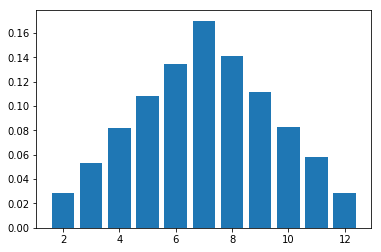

In [4]:
n = 10000

# Six posible results 0, 1, ..., 5
dice = np.zeros(11)

for i in range(n):
    di1 = int(np.floor(np.random.rand()*6))
    di2 = int(np.floor(np.random.rand()*6))
    dice[di1+di2] += 1  # increment in 1 according to dice result

dice = dice / n

plt.bar(range(2,13), dice)

### Probability of having three kids of the same sex

**Families**

How likely is it that a family with three children has all boys or all girls?
Let’s assume that a child is equally likely to be a boy or a girl. Instead of observing the result of actual births, a toss of a
fair coin could be used to simulate a birth. If the toss results in heads (H), then we could say a boy was born; if the toss
results in tails (T), then we could say a girl was born. If the coin is fair (i.e., heads and tails are equally likely), then getting
a boy or a girl is equally likely.

In [5]:
import random as r
import math as m

rep = 100000
iguales = 0

for ri in range(rep):
    hijos = [m.floor(r.random()*2) for i in range(3)]
    mujeres = sum(hijos)
    if mujeres==0 or mujeres==3:
        iguales += 1
        
print("Probabilidad de tener todos los hijos del mismo sexo:", iguales/rep)

Probabilidad de tener todos los hijos del mismo sexo: 0.25156


### The birthday problem

Ver: https://en.wikipedia.org/wiki/Birthday_problem

In [6]:
import random as r
import math as m

simulaciones = 100000
repite = 0

for s in range(simulaciones):
    cumples = [m.floor(r.random()*365) for i in range(20)]
    
    cuenta_cumples = [0 for i in range(365)]  # array contador de cumples
    
    for dia in cumples:
        cuenta_cumples[dia] += 1  # incrementa el contador para el dia generado en cumples
        
    for cc in cuenta_cumples:
        if cc > 1:
            repite += 1
            break
        
print("Probabilidad de repetir cumple:", repite/simulaciones)

Probabilidad de repetir cumple: 0.41149


** Another version using numpy **

(1, 100)

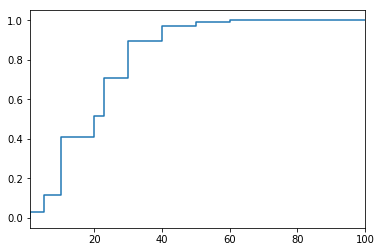

In [7]:
import numpy as np
import matplotlib.pyplot as plt

n = 10  # individuals

def birth_repetition_probability(n, rep = 100000):
    """
    Return the probability of birthday repated day 
    for n individuals
    rep: is the number the experiment is repeated 
    in order to get the probability
    """
    birthdays = np.random.randint(366, size=(rep, n))

    repeated_birthdays = 0

    for bi in birthdays:
        unique, counts = np.unique(bi, return_counts=True)
        if (np.shape(np.where(counts>1))[1]):
            repeated_birthdays += 1

    return repeated_birthdays / rep

individuals = np.array([1,5,10,20,23,30,40,50,60,70,75,100,200,300,350,365,366,367])

rep = 10000

prob = np.array([birth_repetition_probability(ni, rep) for ni in individuals])

plt.step(individuals, prob)
plt.xlim([1, 100])

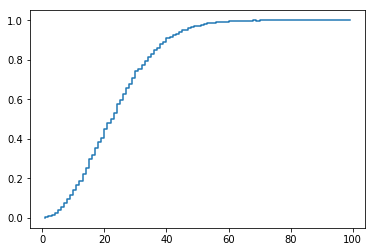

In [8]:
individuals = np.array(range(1,100))

rep = 10000

prob = np.array([birth_repetition_probability(ni, rep) for ni in individuals])

plt.step(individuals, prob)

### Sum of continuos uniforms

/home/salva/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


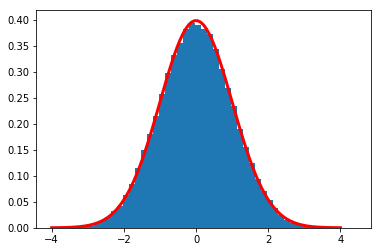

In [9]:
from scipy.stats import norm

n = 100000  # Sequence length
nu = 10  # number of uniforms in the sum

x = []  # rvs sequence

for i in range(n):
    x += [sum([np.random.rand() for i in range(nu)])]

x = np.array(x)

z = (x - np.mean(x))/np.std(x)  # standardize x

xn = np.linspace(-4, 4, 100)
fxn = norm.pdf(xn)

plt.hist(z, bins=50, normed=True)  # plot histogram of std rvs
plt.plot(xn, fxn, '-r', linewidth='3')  # plot theortical std normal distribution

/home/salva/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


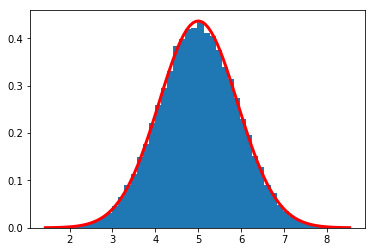

In [10]:
# Let's replicate the code above with array manipulations

n = 100000  # Sequence length
nu = 10  # number of uniforms in the sum

X = np.random.rand(nu, n)  # uniform distributions
SU = np.sum(X, axis=0)  # sum of uniforms

xn = np.linspace(min(SU), max(SU), 100)  # range of SU
m = 1/2 * nu  # mean is nu times the mean of the a single Uniform (b-a)/2
v = 1/12 * nu  # variance is nu times the variance of the a single Uniform (b-a)^2/12
s = np.sqrt(v)
fxn = norm.pdf(xn, m, s)

plt.hist(SU, bins=50, normed=True)  # plot histogram of std rvs
plt.plot(xn, fxn, '-r', linewidth='3')  # plot theortical normal distribution with m,s

/home/salva/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


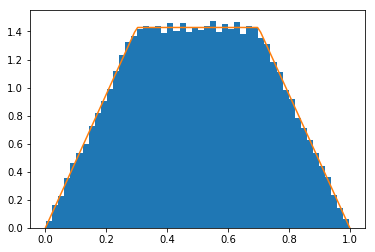

In [11]:
from scipy.stats import trapz

n = 100000  # Sequence length

x = []  # rvs sequence

for i in range(n):
    x += [0.3*np.random.rand() + 0.7*np.random.rand()]

x = np.array(x)

xtrap = np.linspace(0,1,100)
fxtrap = trapz.pdf(xtrap, 0.3, 0.7, loc=0, scale=1)

plt.hist(x, bins=50, normed=True)  # plot histogram of std rvs
plt.plot(xtrap, fxtrap)

# Random walks

- 1D random walk

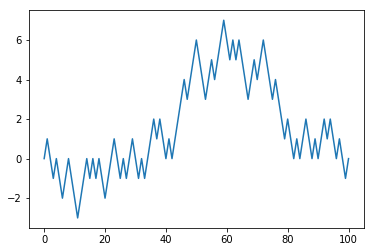

In [12]:
walk = [0]  # walk starts in 0
steps = 100  # steps of the walk

for i in range(steps):
    walk += [walk[-1] + bernoulli()*2-1]

plt.plot(walk)

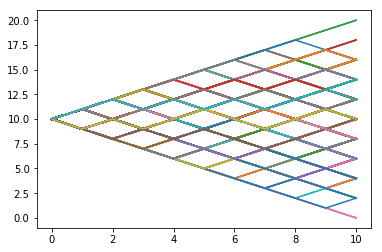

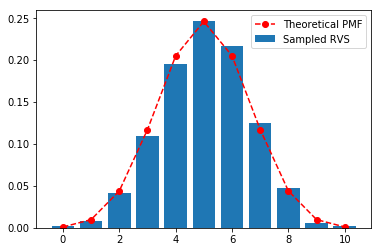

In [13]:
# See: https://en.wikipedia.org/wiki/Bean_machine

walks = 1000
steps = 10

p0 = np.ones((1,walks))*steps  # position a time 0 is 10
# steps movement down or up (-1,1)
sn = np.random.randint(0, 2, size=(steps,walks))*2-1

w = np.concatenate((p0, sn))
w = np.cumsum(w, axis=0)

plt.plot(w)
plt.show()

# Scaling the results
w = w / 2
unique, counts = np.unique(w[steps], return_counts=True)
plt.bar(unique, counts /  walks)  # bar diagram

# ploting binomial polygon curve
from scipy.stats import binom
x = np.linspace(0, steps, steps+1, dtype='int')  # variable range
px = binom.pmf(x, steps, 0.5)
plt.plot(x, px, '--ro')
plt.legend(["Theoretical PMF", "Sampled RVS"])

### Parrondo paradox:

- Game S: probability of going up is 0.495 (head probability, 1 coin tossing).
- Game C: It involves two coins, one of which, the bad one, comes up heads only 9.5 percent of the time, tails 90.5 percent. The other coin, the good one, comes up heads 74.5 percent of the time, tails 25.5 percent. As in game S, you move up a stair if the coin you flip comes up heads and you move down one if it comes up tails. If the number of the stair you’re on at the time you play game C is a multiple of 3 (that is, ...,-9, -6, -3, 0, 3, 6, 9, 12,...), then you flip the bad coin. If the number of the stair you’re on at the time you play game C is not a multiple of 3, then you flip the good coin.
- Alternatively, play two games of S followed by two games of C followed by two games of S and so on, all the while keeping your place on the staircase, what happens now.

See:
- __[Who's Counting: Winning at Losing Games.](https://abcnews.go.com/Technology/WhosCounting/story?id=144000&page=1)__
- __[Wikipedia: Parrondo's Paradox.](https://en.wikipedia.org/wiki/Parrondo%27s_paradox)__
- __[Beyond Parrondo's Paradox. Nature Scientific Reports 4, Article number: 4244.](https://www.nature.com/articles/srep04244)__

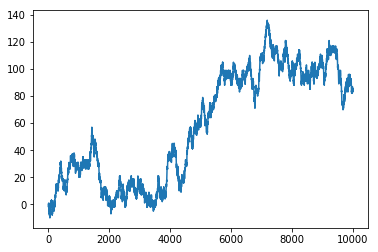

In [14]:
def tossCoin(p):
    """
    Go up with p probability
    Go down otherwise
    """
    if np.random.rand() < p:
        return 1
    else:
        return -1
    

def gameS(p, walk):
    """
    1D random walk with n steps 
    with p probability (of going up in each step)
    """
    walk.append(walk[-1] + tossCoin(p))


def gameC(p1, p2, walk):
    """
    p1: bad coin
    p2: good coin
    """
    # Multiple of 3, toss bad coin
    # Toss good coin otherwise
    if not walk[-1] % 3:
        walk.append(walk[-1] + tossCoin(p1))
    else:
        walk.append(walk[-1] + tossCoin(p2))


def parrondoGame(steps):
    """
    Usage: python parrondo.py steps
    steps: number of steps for the Parrondo random walk
    Two games S, followed by two games C
    """
    walk = [0]
    p = 0.495
    p1 = 0.095
    p2 = 0.745
    for i in range(0, steps, 4):
        gameS(p, walk)
        gameS(p, walk)
        gameC(p1, p2, walk)
        gameC(p1, p2, walk)

    plt.plot(walk)
    plt.show()
    

parrondoGame(steps=10000)

### 1D-Random Walk with absorbing barriers

Absorbed in zero: 74 Absorbed in w: 26
P(Abs=0): 0.74 P(Abs=w): 0.26
Expected life: 17.42


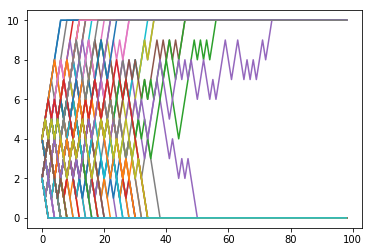

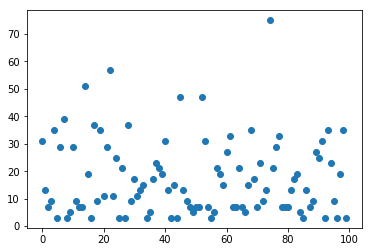

/home/salva/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


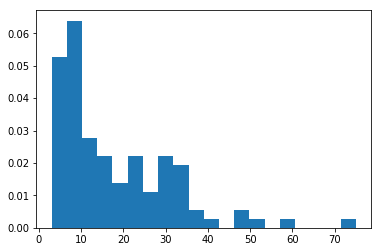

In [15]:
# 1D-Random Walk with absorbing barriers
import numpy as np
import matplotlib.pyplot as plt

nw = 100  # number of walks
ns = 300  # number of steps (use ns >> n(w-n))
w = 10  # cliff width, cliff starts in 0
n = 3  # starting position
life = []  # Stores life of each walk

origin = np.zeros((1, nw), dtype='int') + n  # Start in n
walk = np.random.randint(2, size=(ns-1, nw))*2-1  # Generate int array in {-1,1}
walk = np.concatenate((origin, walk), axis=0)  # Concatenate origin
walk = np.cumsum(walk, axis=0)  # Cumulative sum generates walk

# Iterate over number of walks to correct barrier abosorbing
for i in range(nw):
    pos_zero = np.where(walk[:,i]==0)[0]  # Search for 0 values
    if len(pos_zero):  # if found, it must be absorbed
        walk[pos_zero[0]:ns,i] = 0  # absortion generates 0 value
    else:
        pos_zero = np.array([np.nan])
    
    pos_w = np.where(walk[:,i]==w)[0]  # Search for w values
    if len(pos_w):  # if found, it must be absorbed
        walk[pos_w[0]:ns,i] = w  # absortion generates w value
    else:
        pos_w = np.array([np.nan])
        
    l = np.concatenate((pos_zero, pos_w))  # concatenate all absorbing positions
    if len(l[~np.isnan(l)]):
        life += [np.amin(l[~np.isnan(l)])]  # get the minimum (this is the walk i life)
        
absorbed_in_zero = len(np.where(walk[-1,:]==0)[0])  # Walks (with final step) absorbed at 0
absorbed_in_w = len(np.where(walk[-1,:]==w)[0])  # Walks (with final step) absorbed at 0

print("Absorbed in zero:", absorbed_in_zero, 
      "Absorbed in w:", absorbed_in_w)
print("P(Abs=0):", absorbed_in_zero/nw, 
      "P(Abs=w):", absorbed_in_w/nw)
print("Expected life:", np.mean(life))  # Expected (mean) life

plt.plot(walk[1:100,:])
plt.show()

plt.plot([i for i in range(len(life))], life, 'o')
plt.show()

plt.hist(life, bins=20, normed=True)
plt.show()

### Continous walks

- Gaussian random walk, brownian motion (left)
- Levy flight, foraging motion (right)

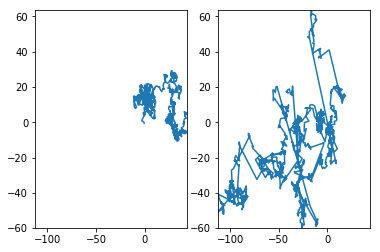

In [16]:
# See: https://math.stackexchange.com/questions/52869/numerical-approximation-of-levy-flight

steps = 1000

# levy flight
rt = np.random.rand(steps)
rd = np.random.rand(steps)

theta = rt*np.pi*2
alpha = 1.5
radius = rd**(-1/alpha)  # F^-1(u)

xl = np.cumsum(radius*np.cos(theta))
yl = np.cumsum(radius*np.sin(theta))

# gaussian walk
xn = np.cumsum(norm.rvs(0, 1, size=steps))
yn = np.cumsum(norm.rvs(0, 1, size=steps))

x_max = np.max([np.max(xl), np.max(xn)])
y_max = np.max([np.max(yl), np.max(yn)])
x_min = np.min([np.min(xl), np.min(xn)])
y_min = np.min([np.min(yl), np.min(yn)])

# Setting axes limits
plt.figure(1)
plt.subplot(121)  # Gaussian walk
axes = plt.gca()
axes.set_xlim([x_min,x_max])
axes.set_ylim([y_min,y_max])
plt.plot(xn, yn)

plt.subplot(122)  # Levy flight
axes = plt.gca()
axes.set_xlim([x_min,x_max])
axes.set_ylim([y_min,y_max])
plt.plot(xl, yl)
plt.show()

plt.show()

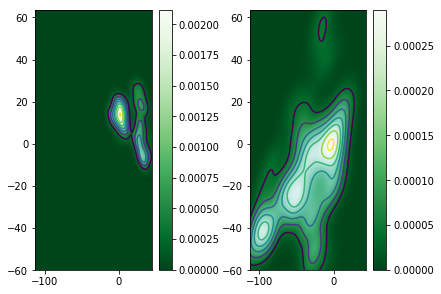

In [17]:
from scipy.stats import kde

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=300

# Make the plot
# Setting axes limits
plt.figure(1)
plt.subplot(121)  # Gaussian walk

# Data is from gaussian walk
k = kde.gaussian_kde([xn, yn])
xi, yi = np.mgrid[x_min:x_max:nbins*1j, y_min:y_max:nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
plt.pcolormesh(xi, yi, zi.reshape(xi.shape))
# Add color bar
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Greens_r)
plt.colorbar()

# contour
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
plt.contour(xi, yi, zi.reshape(xi.shape) )


plt.subplot(122)  # Levy flight

# Data is from levy flight
k = kde.gaussian_kde([xl, yl])
xi, yi = np.mgrid[x_min:x_max:nbins*1j, y_min:y_max:nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
plt.pcolormesh(xi, yi, zi.reshape(xi.shape))
# Add color bar
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Greens_r)
plt.colorbar()

# contour
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
plt.contour(xi, yi, zi.reshape(xi.shape) )

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()